# Python Data Science Handbook
## By Jake VenderPlas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser
from pandas_datareader import data

In [9]:
# plt.style.use('classic') # makes your figure bigger

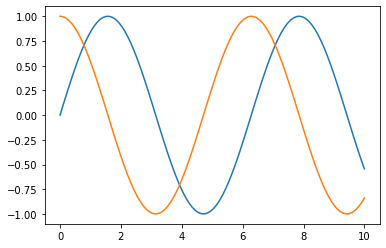

In [2]:
x=np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

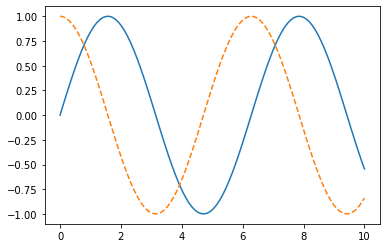

In [2]:
x=np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x),'-')
plt.plot(x, np.cos(x),'--')
plt.show()

### Saving Figures to File

In [14]:
fig.savefig('my_figure.png')

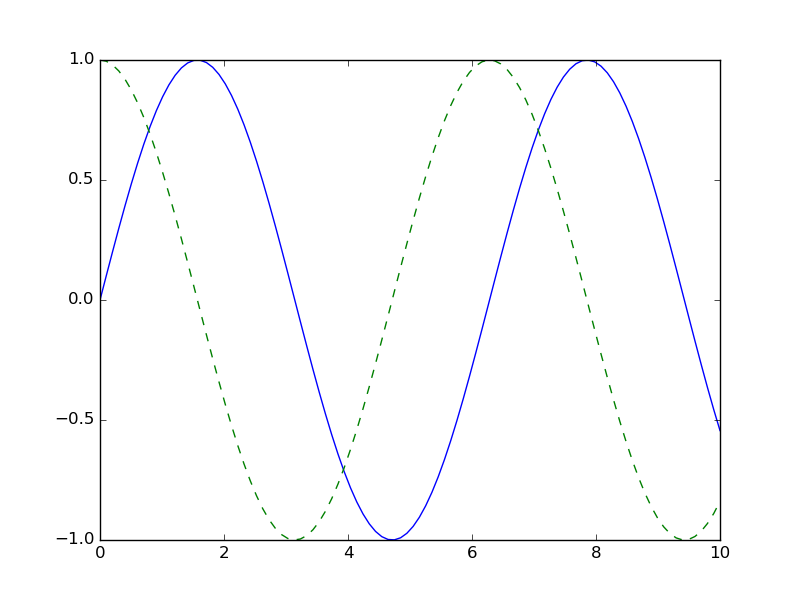

In [5]:
from IPython.display import Image # show an image from the current directory if its save
Image('my_figure.png')

In [16]:
fig.canvas.get_supported_filetypes() # available file for save a figure/image

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Two Interfaces for the Price of One

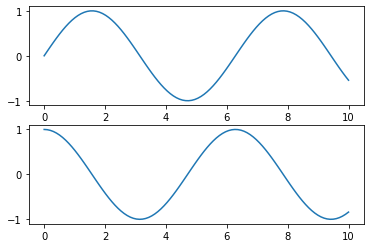

In [6]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(x, np.sin(x))

plt.subplot(2,1,2)
plt.plot(x, np.cos(x))

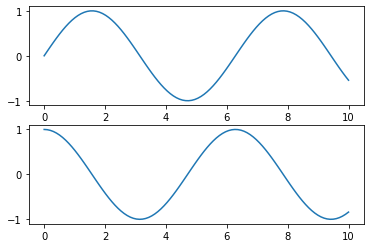

In [7]:
fig, ax = plt.subplots(2) #ax is a vector to share the x axis vector
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## Simple Line Plots

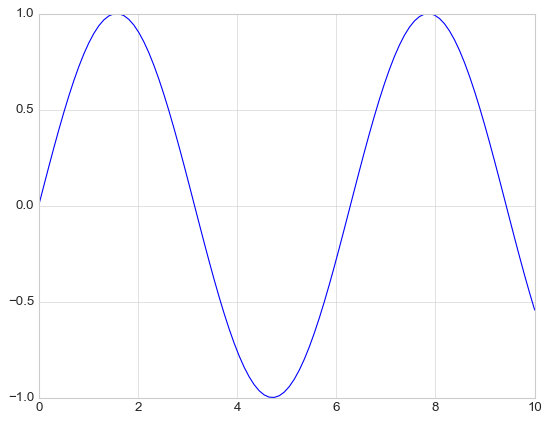

In [26]:
plt.style.use('seaborn-whitegrid')
fig=plt.figure()
ax= plt.axes()
ax.plot(x, np.sin(x))

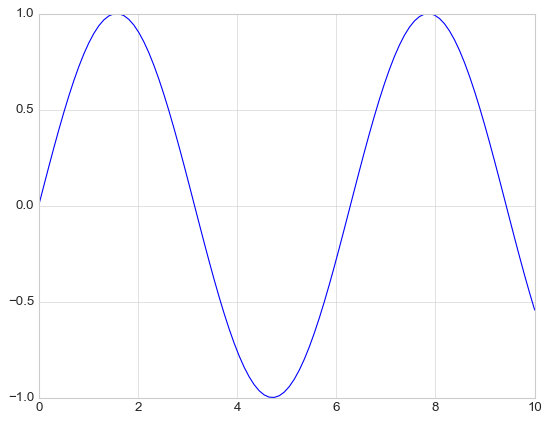

In [27]:
plt.plot(x, np.sin(x))

### Adjusting the Plot: Line Colors and Styles

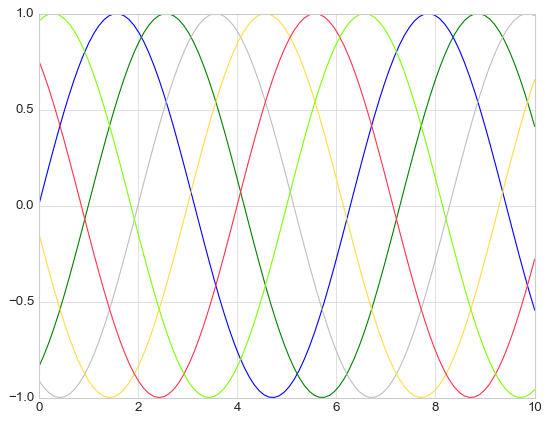

In [29]:
plt.plot(x, np.sin(x - 0), color='blue') # specify color by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44') # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

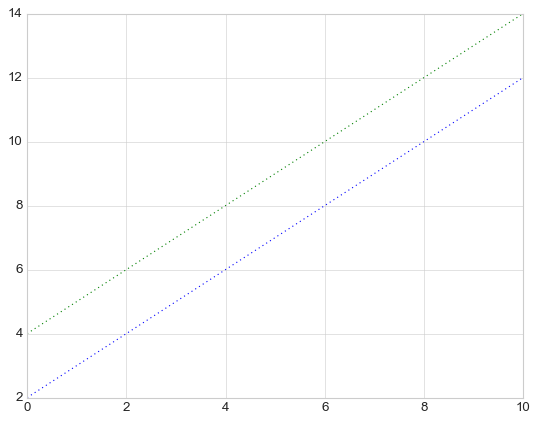

In [33]:
plt.plot(x, x+2, linestyle= 'dotted') # can use solid, dashed, dashdot
plt.plot(x, x+4, linestyle= ':')

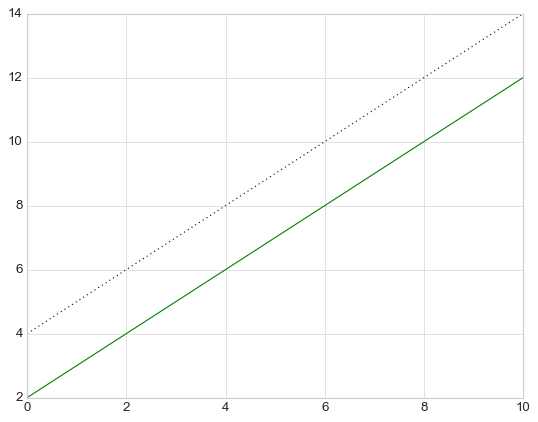

In [36]:
plt.plot(x, x+2, '-g') # g-green, k-black, c-cyan
plt.plot(x, x+4, ':k')

(-1.5, 1.5)

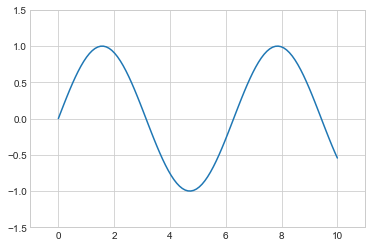

In [9]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

[-1, 11, -1.5, 1.5]

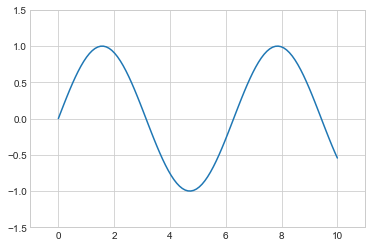

In [10]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

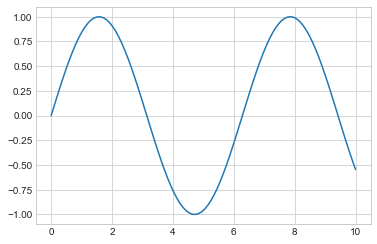

In [11]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])
plt.axis('tight')

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

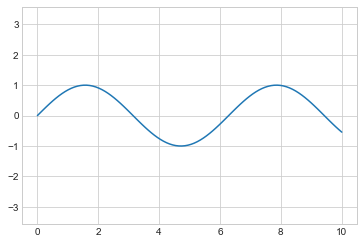

In [12]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])
plt.axis('equal')

### Labeling Plots

Text(0, 0.5, 'sin(x)')

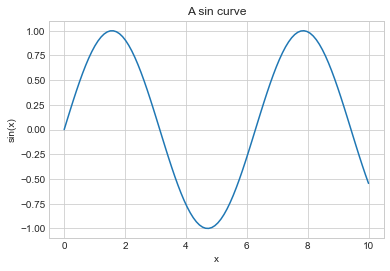

In [15]:
plt.plot(x, np.sin(x))
plt.title('A sin curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

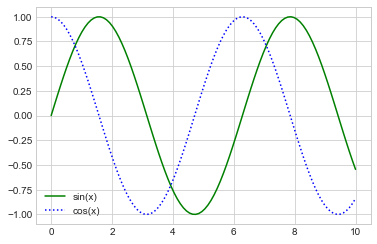

In [22]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
# plt.axis('equal')
plt.legend()

## Simple Scatter Plots

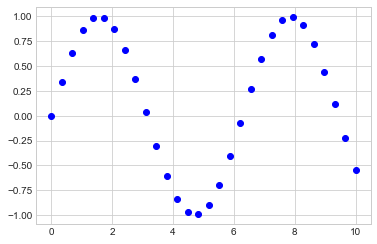

In [25]:
x=np.linspace(0, 10, 30)
y=np.sin(x)
plt.plot(x,y, 'o', color='blue')

(0, 1.8)

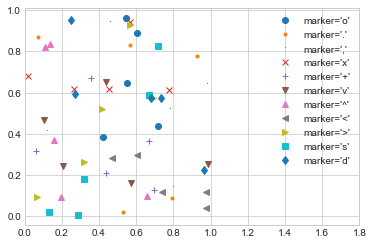

In [42]:
rng=np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

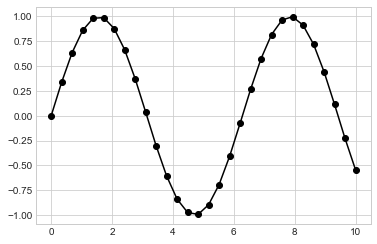

In [43]:
plt.plot(x, y, '-ok')

(-1.2, 1.2)

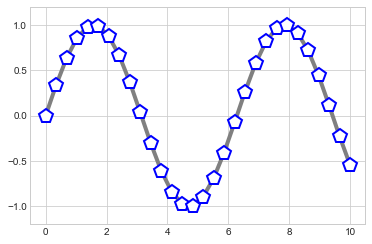

In [45]:
plt.plot(x, y, '-p', color='gray', markersize=15, linewidth=4, markerfacecolor='white', markeredgecolor='blue', markeredgewidth=2)
plt.ylim(-1.2, 1.2)

### Scatter Plots with plt.scatter

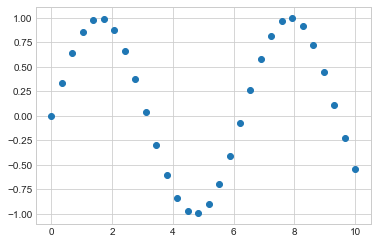

In [47]:
plt.scatter(x, y, marker='o')

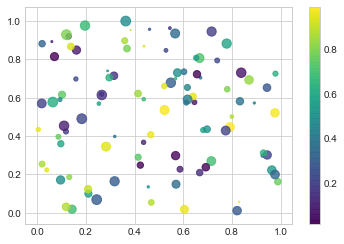

In [49]:
rng=np.random.RandomState(0)
x=rng.rand(100)
y=rng.rand(100)
color=rng.rand(100)
size = 100* rng.rand(100)
plt.scatter(x, y, c=color, s=size, alpha=0.8, cmap='viridis')
plt.colorbar()

Text(0, 0.5, 'sepal width (cm)')

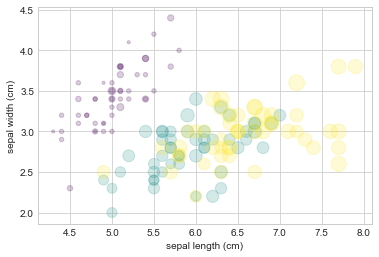

In [56]:
from sklearn.datasets import load_iris
iris=load_iris()
feature=iris.data.T
plt.scatter(feature[0], feature[1], alpha=0.2, s=100*feature[3], c=iris.target, cmap='viridis') # s=size(scaler), c-color, cmap-colormap
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [ ]:
# plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to
# render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually

## Visualizing Errors

### Basic Errorbars

<ErrorbarContainer object of 3 artists>

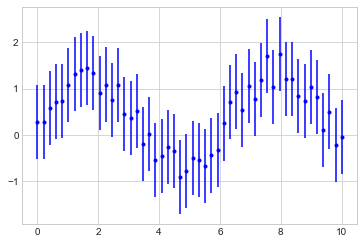

In [62]:
x=np.linspace(0, 10, 50)
dy=0.8
y= np.sin(x)+dy*np.random.rand(50)
plt.errorbar(x, y, yerr=dy, fmt='.b') # yerr-scalar or array like, fmt-format

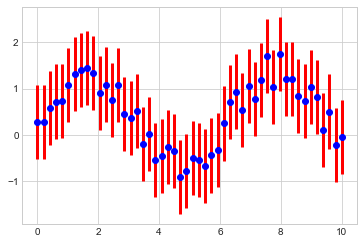

In [67]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='blue', ecolor='red', elinewidth=3, capsize=0); 
#ecolor-error of the colorbar, capsize-cap size in the error bar

### Continuous Errors

In [ ]:
# In some situations it is desirable to show errorbars on continuous quantities. Though Matplotlib does not have a built-in convenience routine for this type of application,
# it’s relatively easy to combine primitives like plt.plot and plt.fill_between for a useful result.

In [72]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(y_std)  # 2*sigma ~ 95% confidence region

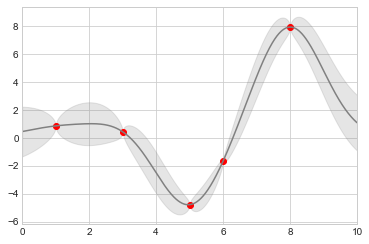

In [73]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

## Density and Contour Plots

In [3]:
plt.style.use('seaborn-white')

### Visualizing a Three-Dimensional Function

In [16]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10+y*x) * np.cos(x)

In [17]:
x=np.linspace(0, 5, 50)
y=np.linspace(0, 5, 40)
X,Y=np.meshgrid(x,y)   # meshgrid returen coordinate matrix from coordinate vector
Z=f(X,Y)

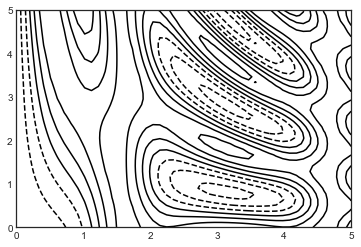

In [18]:
plt.contour(X,Y,Z, colors='black')

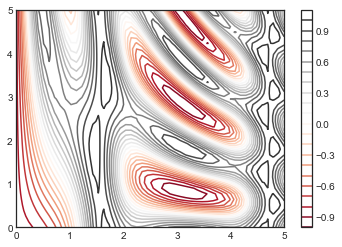

In [23]:
plt.contour(X,Y,Z, 20, cmap='RdGy') # 20 interval line, RdGy (short for Red-Gray)


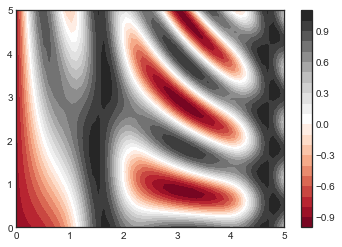

In [24]:
plt.contourf(X,Y,Z, 20, cmap='RdGy') # plt.contourf() for removing the space from the line inbetween
plt.colorbar() 

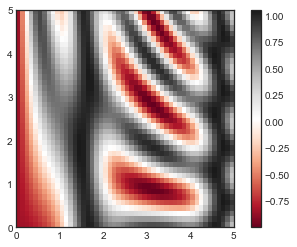

In [28]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')  # plt.imshow() will automatically adjust the axis aspect ratio to match the input data;
plt.colorbar()
plt.axis(aspect='image');

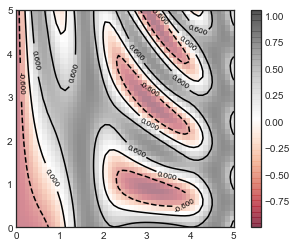

In [32]:
# contours = plt.contour(X, Y, Z, 3, colors='black')
# plt.clabel(contours, inline=True, fontsize=8)
# plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
# cmap='RdGy', alpha=0.5)
# plt.colorbar();

contours= plt.contour(X,Y,Z,3,colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0,5,0,5], origin='lower',cmap='RdGy', alpha=0.5)
plt.colorbar()

## Histograms, Binnings, and Density

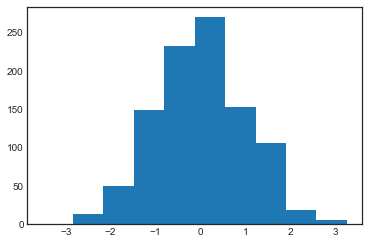

In [57]:
data = np.random.randn(1000)
plt.hist(data);

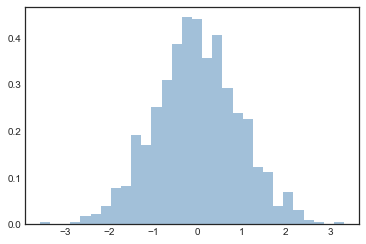

In [45]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

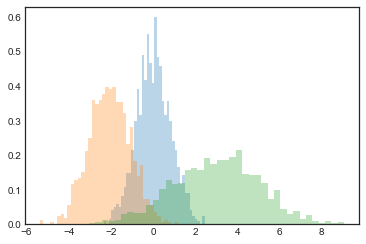

In [56]:
x1=np.random.normal(0, 0.8, 1000)
x2=np.random.normal(-2, 1, 1000)
x3=np.random.normal(3, 2, 1000)
kwargs=dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### Two-Dimensional Histograms and Binnings

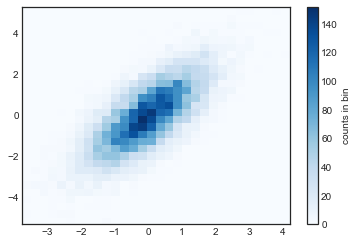

In [60]:
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov, 10000).T
plt.hist2d(x,y, bins=30, cmap='Blues')  # hist2d for two dimensional distogram
cb=plt.colorbar()
cb.set_label('counts in bin')

In [61]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

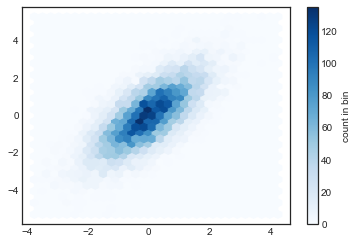

In [62]:
plt.hexbin(x,y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

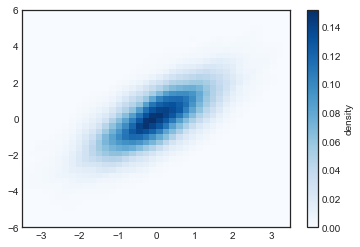

In [63]:
from scipy.stats import gaussian_kde  # Karnel density estimation
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6],
cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

## Customizing Plot Legends

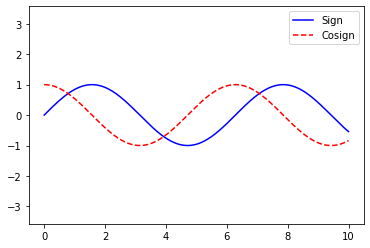

In [5]:
x=np.linspace(0, 10, 1000)
fig, ax =plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sign')
ax.plot(x, np.cos(x), '--r', label='Cosign')
ax.axis('equal')
leg=ax.legend()

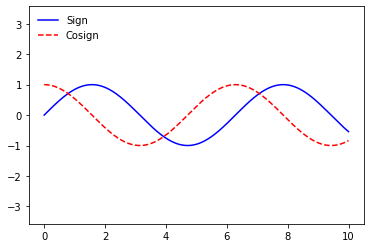

In [6]:
ax.legend(loc='upper left', frameon=False)
fig

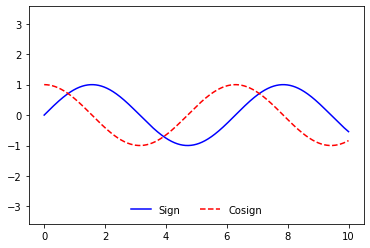

In [8]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

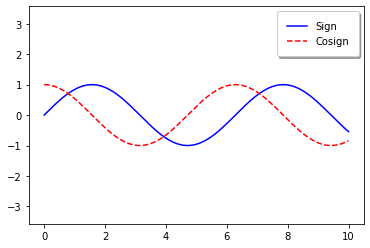

In [9]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend

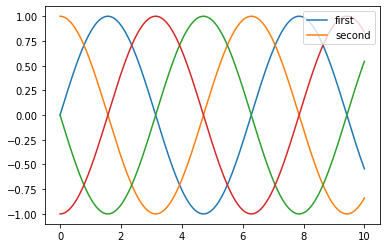

In [13]:
y=np.sin(x[:, np.newaxis]+np.pi*np.arange(0, 2, 0.5))
lines=plt.plot(x,y)
plt.legend(lines[:2], ['first', 'second'], loc='upper right')

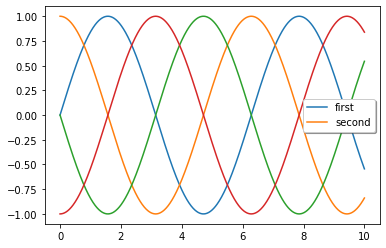

In [18]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True,  fancybox=True,  shadow=True);

## Legend for Size of Points

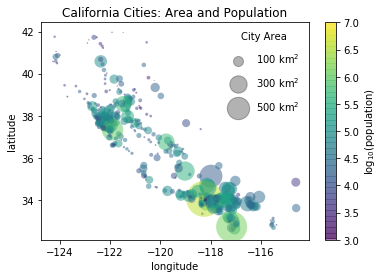

In [22]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

## Multiple Legends

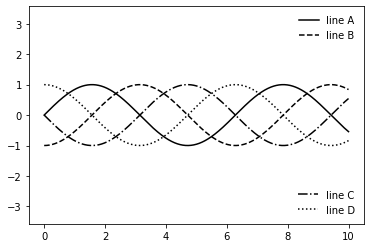

In [24]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')
# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
loc='upper right', frameon=False)
# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
loc='lower right', frameon=False)
ax.add_artist(leg);

## Customizing Colorbars

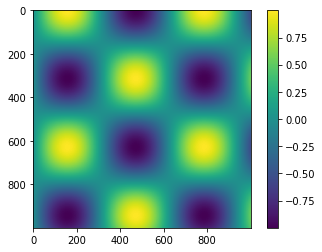

In [29]:
x=np.linspace(0, 10, 1000)
I=np.sin(x)* np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

### Customizing Colorbars

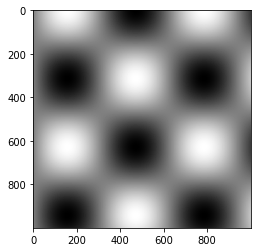

In [31]:
plt.imshow(I, cmap='gray')

In [34]:
from matplotlib.colors import LinearSegmentedColormap
def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # convert RGBA to perceived grayscale luminance
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

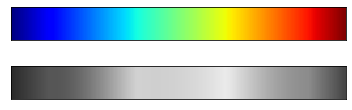

In [35]:
view_colormap('jet')

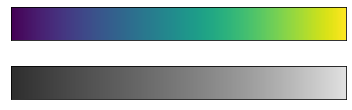

In [36]:
view_colormap('viridis')

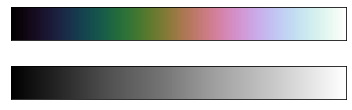

In [37]:
view_colormap('cubehelix')

### Color limits and extensions

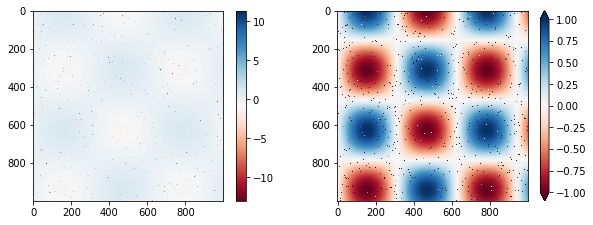

In [41]:
speckles= (np.random.random(I.shape)<0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))

plt.subplot(1,2,1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

### Discrite colorbar

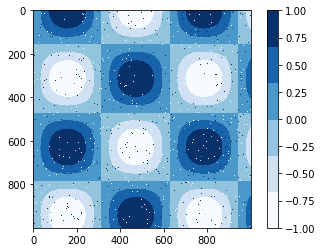

In [43]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1,1)

## Example: Handwritten Digits

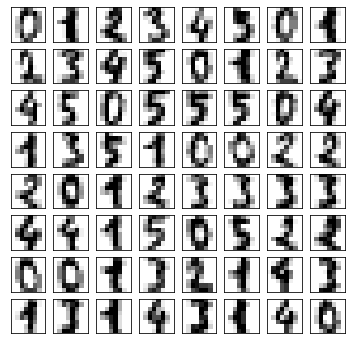

In [3]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=6)
fig, ax = plt.subplots(8,8, figsize=(6, 6))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [4]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

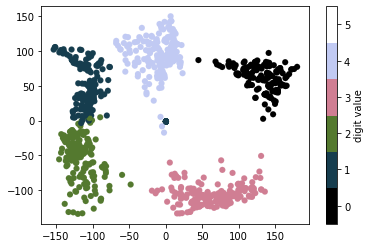

In [6]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

### Multiple Subplots

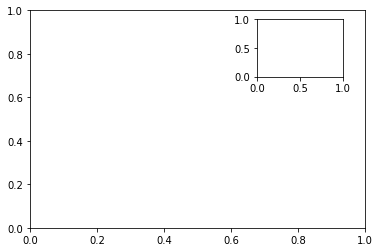

In [8]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

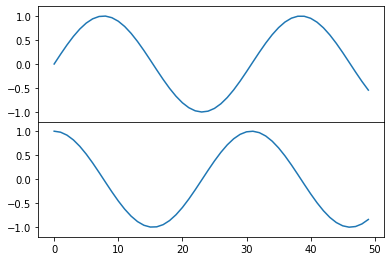

In [10]:
fig=plt.figure()
ax1=fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x=np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

#### plt.subplot: Simple Grids of Subplots

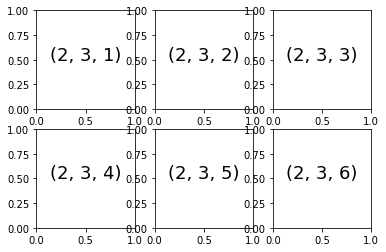

In [13]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')



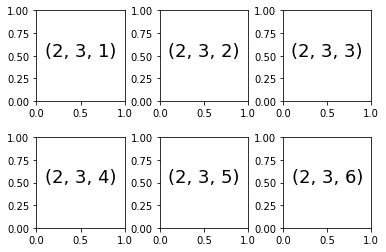

In [15]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')
    

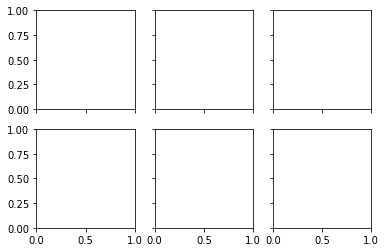

In [16]:
fig, ax= plt.subplots(2, 3, sharex='col', sharey='row')

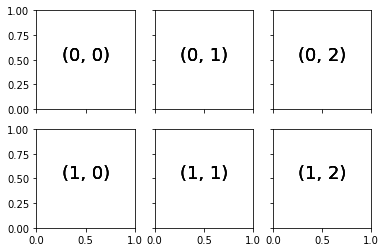

In [19]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i,j)), fontsize=18, ha='center')
fig

### plt.GridSpec: More Complicated Arrangements

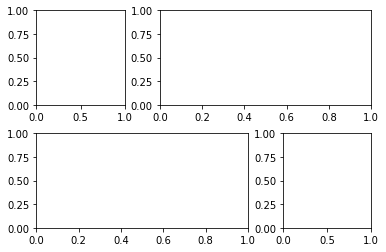

In [30]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

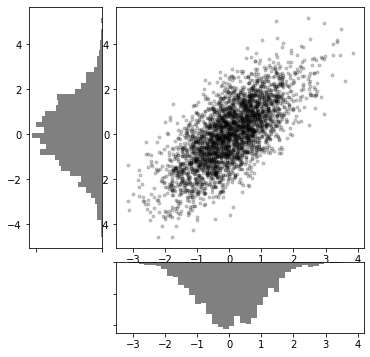

In [33]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Text and Annotation

### Effect of Holidays on US Births

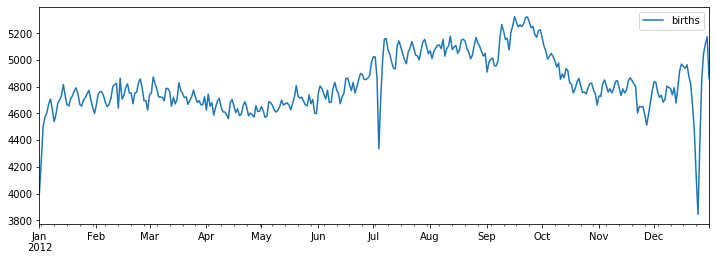

In [2]:
births=pd.read_csv('data/births.csv')
quartiles=np.percentile(births['births'],[25, 50, 75])
mu, sig = quartiles[1], 0.74*(quartiles[2]-quartiles[0])
births= births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

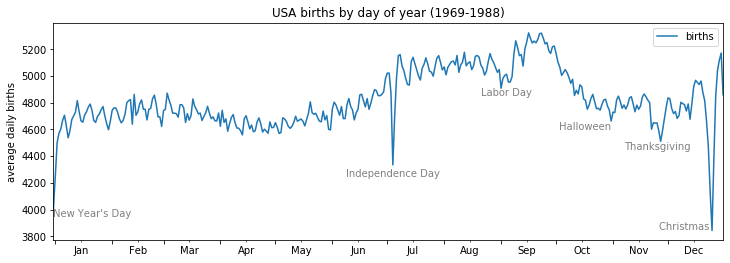

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

### Transforms and Text Position

Text(0.2, 0.2, '. Data: (0.2,0.2)')

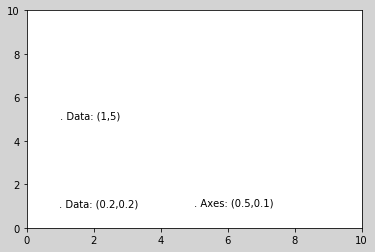

In [6]:
fig, ax=  plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
ax.text(1, 5,". Data: (1,5)", transform=ax.transData)
ax.text(0.5, 0.1,". Axes: (0.5,0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2,". Data: (0.2,0.2)", transform=fig.transFigure)

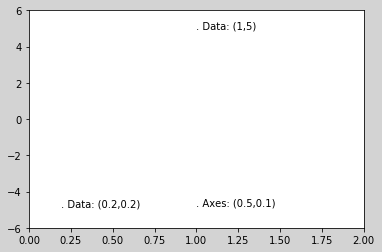

In [8]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

Text(2, -6, 'local miminum')

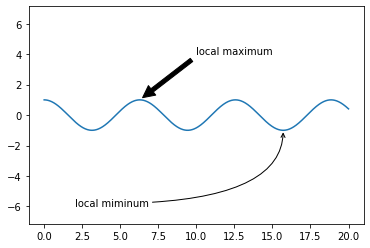

In [15]:
fig, ax = plt.subplots()
x= np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local miminum', xy=(5*np.pi, -1), xytext=(2, -6),arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))

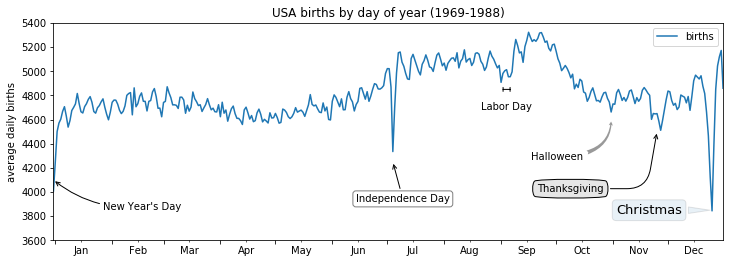

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',xytext=(50, -30), textcoords='offset points',arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),xycoords='data', textcoords='data',arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',xytext=(-80, -40), textcoords='offset points',arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',xytext=(-120, -60), textcoords='offset points',bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',xytext=(-30, 0), textcoords='offset points',size=13, ha='right', va="center",bbox=dict(boxstyle="round", alpha=0.1), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

## Customizing Ticks

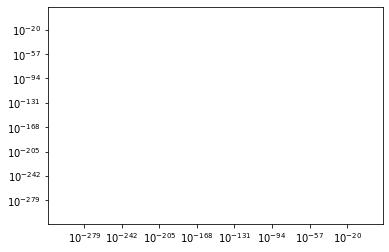

In [3]:
ax=plt.axes(xscale='log', yscale='log')

### Hiding Ticks or Labels

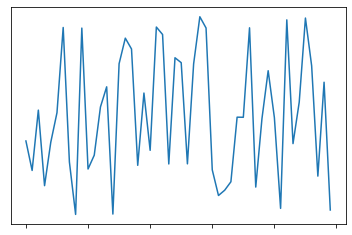

In [5]:
ax=plt.axes()
ax.plot(np.random.rand(50))
# LogLocator (which makes sense for a logarithmic plot). Minor ticks, though, have
#their labels formatted by a NullFormatter; this says that no labels will be shown.
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\MondalPa\scikit_learn_data


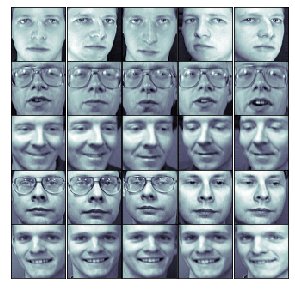

In [9]:
fig, ax = plt.subplots(5, 5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces().images
# hiding ticks or labels. We can do this using plt.NullLocator() and plt.NullFormatter(),
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10*i+j], cmap='bone')

### Reducing or Increasing the Number of Ticks

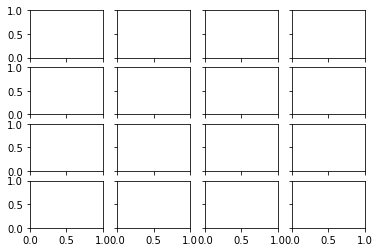

In [11]:
fig, ax= plt.subplots(4,4, sharex=True, sharey=True)

### Fancy Tick Formats

(0, 9.42477796076938)

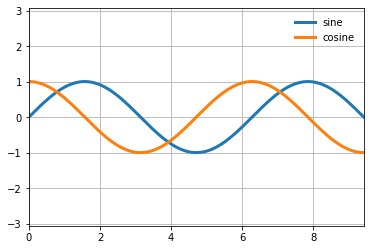

In [16]:
fig, ax = plt.subplots()
x= np.linspace(0, 3*np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='sine')
ax.plot(x, np.cos(x), lw=3, label='cosine')
ax.grid(True)
ax.legend(frameon= False)
ax.axis('equal')
ax.set_xlim(0, 3*np.pi)

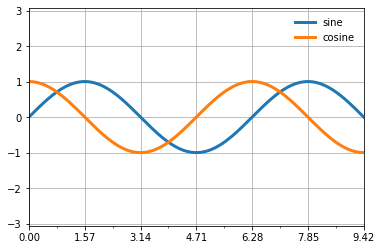

In [19]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

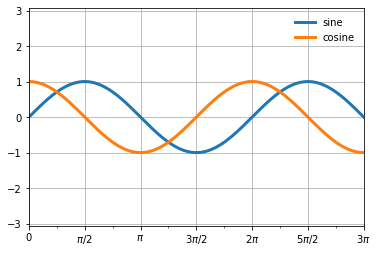

In [20]:
def format_func(value, tick_number):
# find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

### Summary of Formatters and Locators

In [ ]:
"""
Locator class Description

NullLocator No ticks
FixedLocator Tick locations are fixed
IndexLocator Locator for index plots (e.g., where x = range(len(y)))
LinearLocator Evenly spaced ticks from min to max
LogLocator Logarithmically ticks from min to max
MultipleLocator Ticks and range are a multiple of base
MaxNLocator Finds up to a max number of ticks at nice locations
AutoLocator (Default) MaxNLocator with simple defaults
AutoMinorLocator Locator for minor ticks

Formatter class Description

NullFormatter No labels on the ticks
IndexFormatter Set the strings from a list of labels
FixedFormatter Set the strings manually for the labels
FuncFormatter User-defined function sets the labels
FormatStrFormatter Use a format string for each value
ScalarFormatter (Default) Formatter for scalar values
LogFormatter Default formatter for log axes
"""

## Customizing Matplotlib: Configurations and Stylesheets

### Plot Customization by Hand

(array([  3.,  13.,  46., 118., 214., 251., 186., 112.,  37.,  20.]),
 array([-3.33915368, -2.72794166, -2.11672965, -1.50551763, -0.89430561,
        -0.28309359,  0.32811843,  0.93933045,  1.55054247,  2.16175449,
         2.77296651]),
 <a list of 10 Patch objects>)

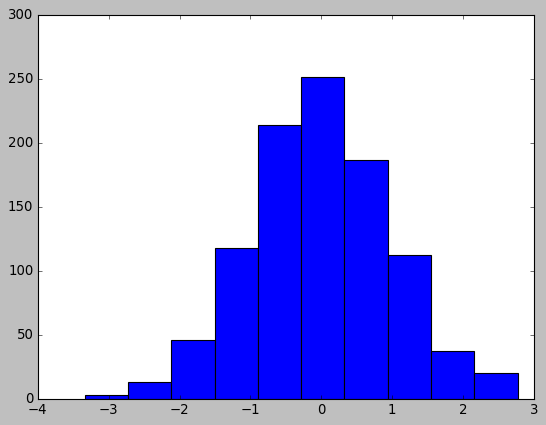

In [30]:
plt.style.use('classic')
x=np.random.randn(1000)
plt.hist(x)

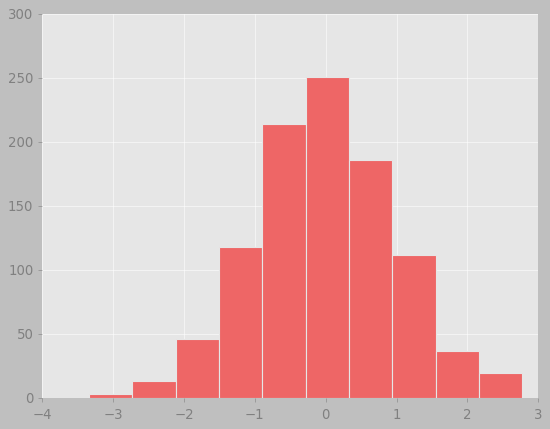

In [41]:
ax=plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
plt.grid(color='w', linestyle='solid')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(color='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');


### Changing the Defaults: rcParams

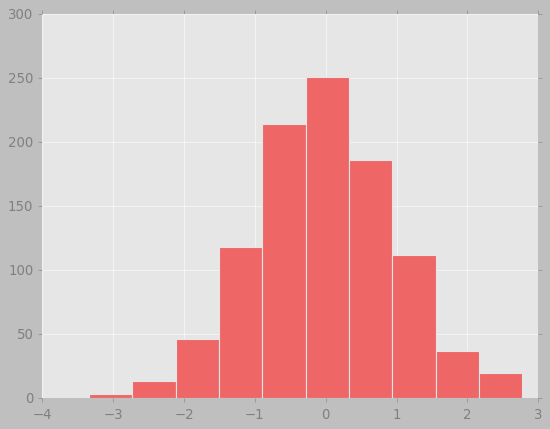

In [45]:
# Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
IPython_default = plt.rcParams.copy()
from matplotlib import cycler
colors = cycler('color',['#EE6666', '#3388BB', '#9988DD','#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.hist(x);

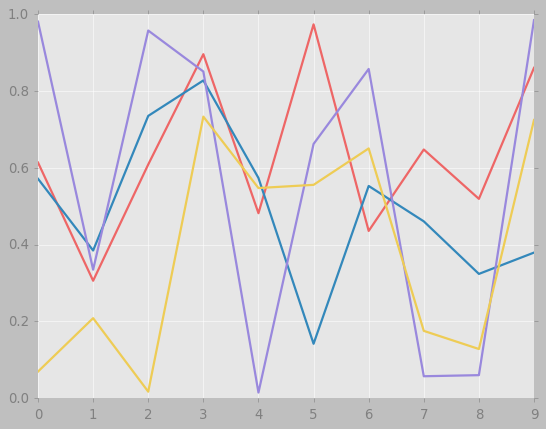

In [46]:
for i in range(4):
    plt.plot(np.random.rand(10))

### Stylesheets

In [49]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

In [51]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

#### Default style

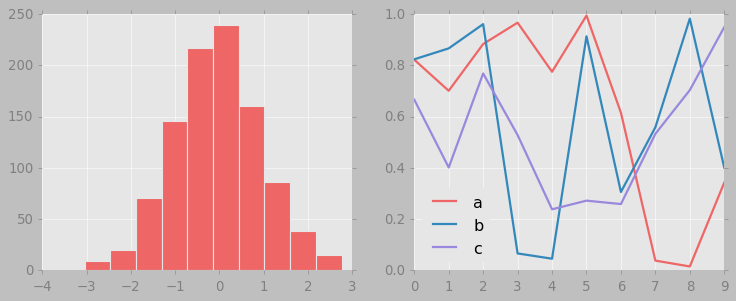

In [55]:
plt.rcParams.update(IPython_default)
hist_and_lines()

#### FiveThirtyEight style

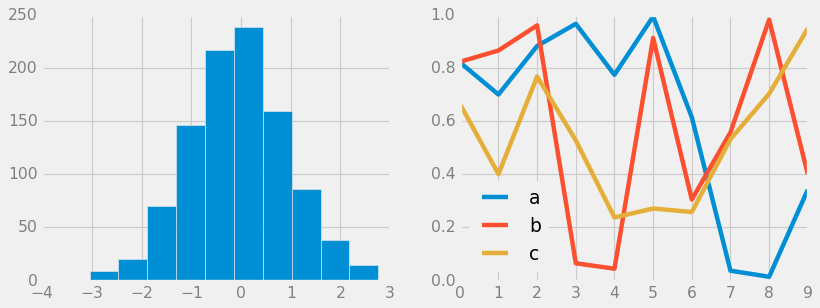

In [61]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

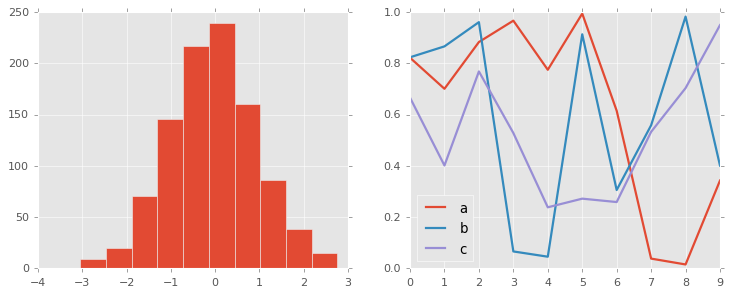

In [62]:
with plt.style.context('ggplot'):
    hist_and_lines()

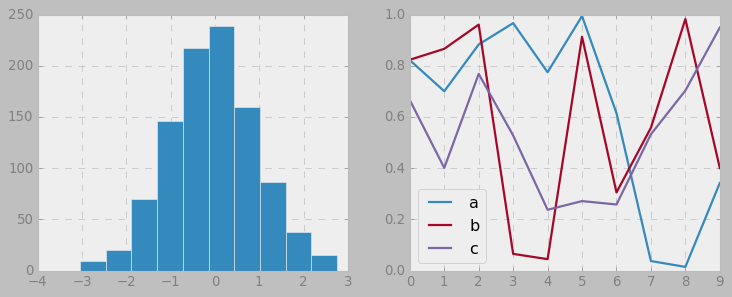

In [64]:
with plt.style.context('bmh'): # bayesian method for hanckers sytles
    hist_and_lines()

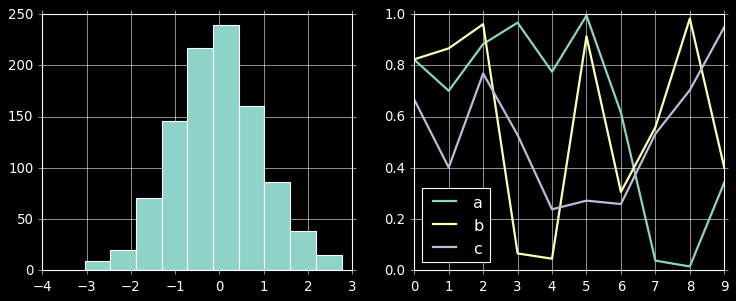

In [65]:
with plt.style.context('dark_background'): 
    hist_and_lines()

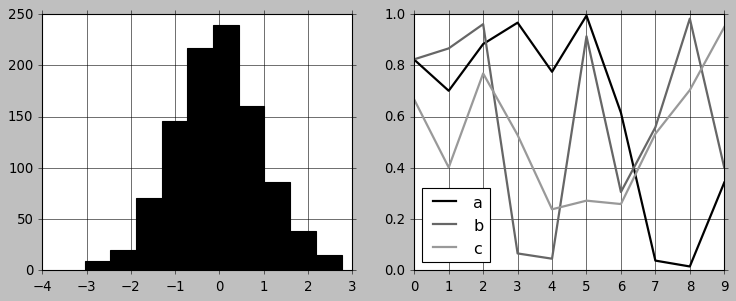

In [66]:
with plt.style.context('grayscale'): 
    hist_and_lines()

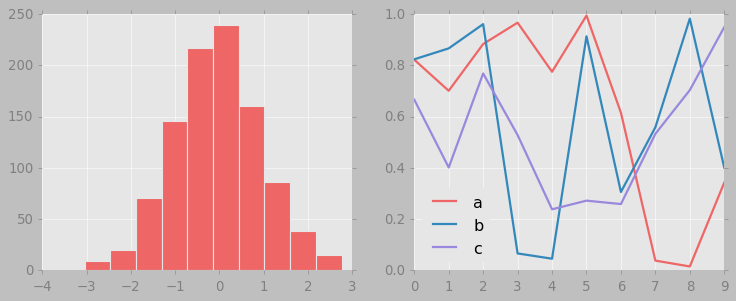

In [67]:
import seaborn 
hist_and_lines()

## Three-Dimensional Plotting in Matplotlib

In [70]:
from mpl_toolkits import mplot3d
plt.style()

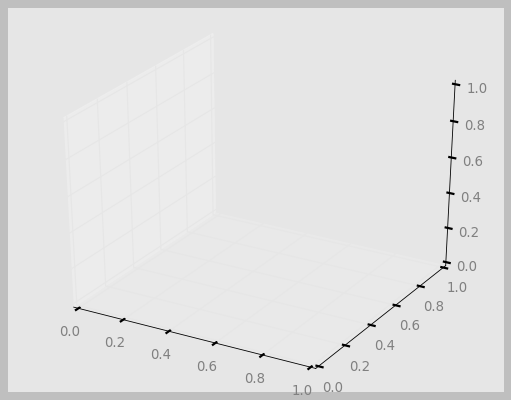

In [71]:
fig= plt.figure()
ax= plt.axes(projection='3d')


### Three-Dimensional Points and Lines

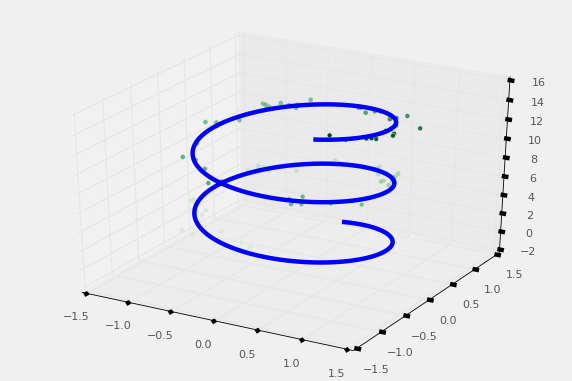

In [88]:
plt.style.use('fivethirtyeight')
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'blue')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Three-Dimensional Contour Plots

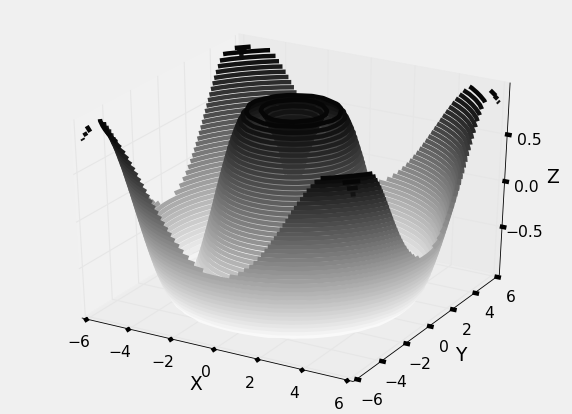

In [114]:
plt.style.use('fivethirtyeight')
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
x=np.linspace(-6, 6, 30)
y=np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x,y) # meshgrid return coordinate matrices from coordinate vectors.
Z=f(X,Y)

fig =plt.figure()
ax= plt.axes(projection='3d')
ax.contour3D(X,Y, Z, 45 , cmap='binary') # 50 is the step size of the conture plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

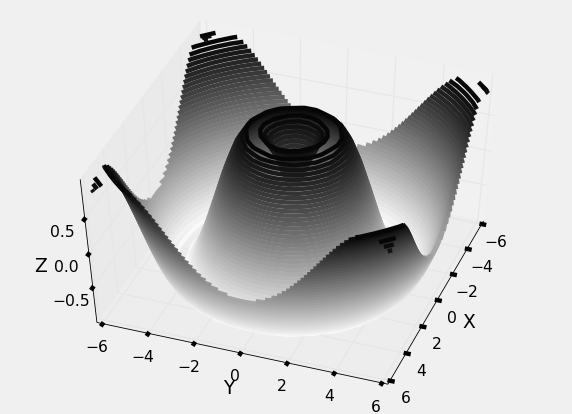

In [115]:
# an elevation of 60 degrees (that is,60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35
# degrees counter-clockwise about the z-axis):

ax.view_init(50,20)
fig

### Wireframes and Surface Plots

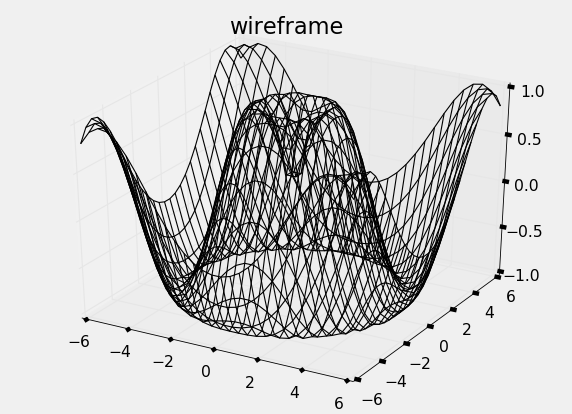

In [122]:
fig= plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z,rstride=1, cstride=1, linewidth=1, color='black')
ax.set_title('wireframe');

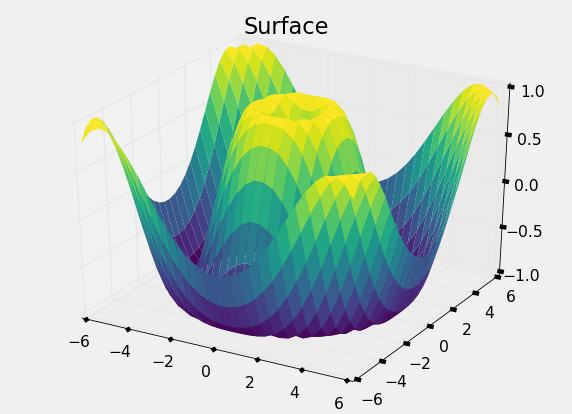

In [124]:
fig= plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,rstride=1, cstride=1, linewidth=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface');

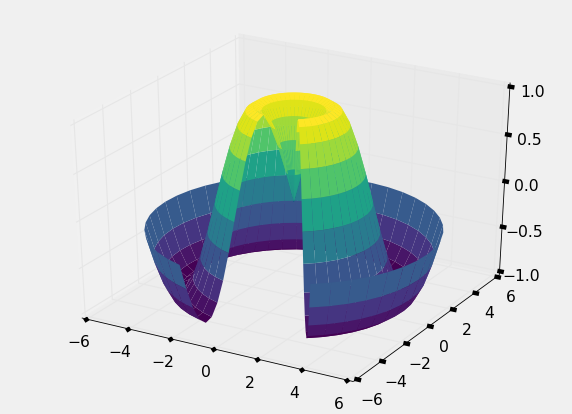

In [129]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

### Surface Triangulations

In [131]:
theta= 2*np.pi*np.random.random(1000)
r = 6 * np.random.random(1000)
x= np.ravel(r* np.sin(theta)) # ravel return a contigious flattened array.
y= np.ravel(r* np.cos(theta))
z=f(x,y)

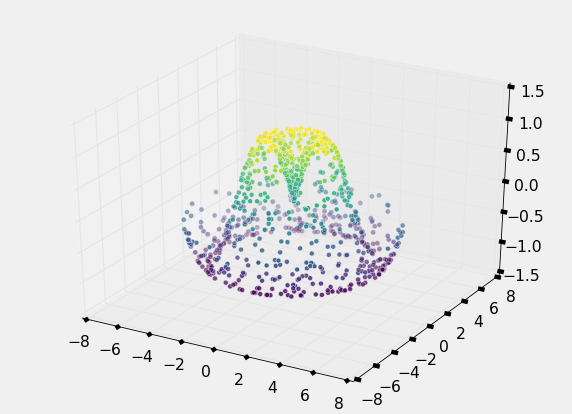

In [133]:
ax= plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

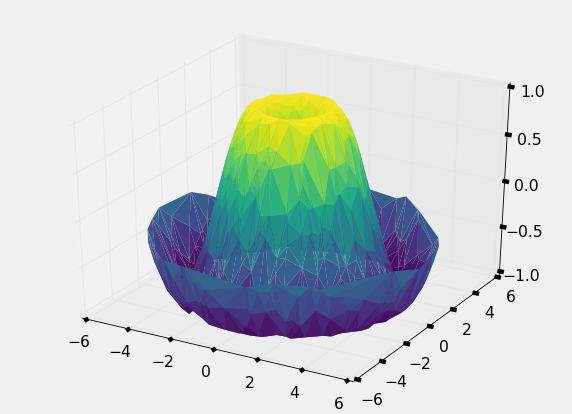

In [136]:
ax=plt.axes(projection='3d')
# ax.plot_trisurf, which creates a surface by first finding a set of triangles formed between adjacent points
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

### Visualizing a Möbius strip

In [ ]:
# A Möbius strip is similar to a strip of paper glued into a loop with a half-twist. Topologically,
# it’s quite interesting because despite appearances it has only a single side!

In [138]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

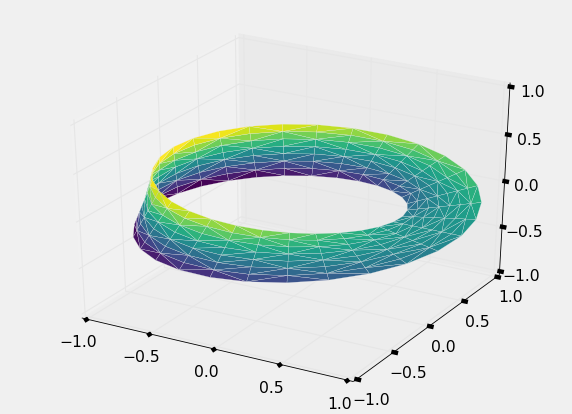

In [140]:
phi = 0.5 * theta
# radius in x-y plane
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

## Geographic Data with Basemap

## Visualization with Seaborn

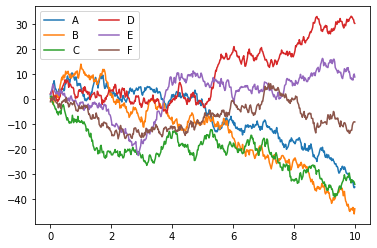

In [4]:
rng= np.random.RandomState(0)
x= np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [5]:
import seaborn as sns
sns.set()

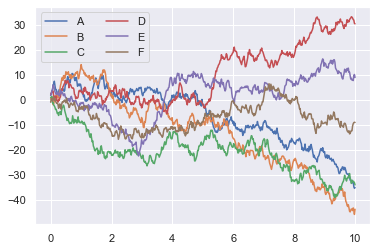

In [6]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Histograms, KDE, and densities

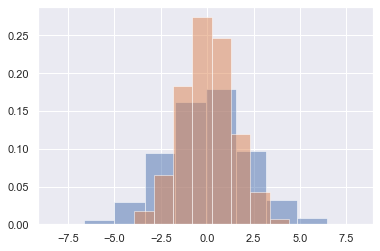

In [10]:
data= np.random.multivariate_normal([0,0], [[5,2],[2,2]], size=2000)
data= pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

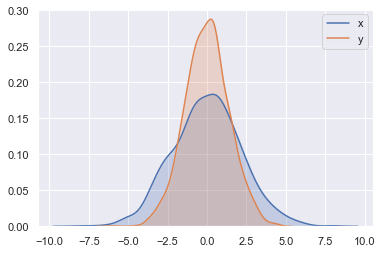

In [11]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

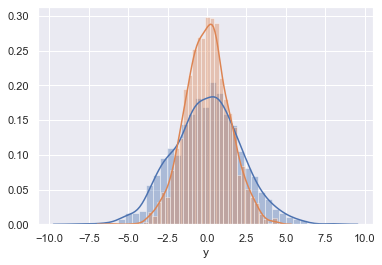

In [12]:
sns.distplot(data['x'])
sns.distplot(data['y']);

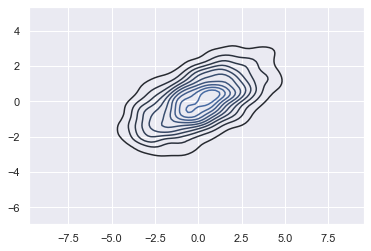

In [14]:
sns.kdeplot(data);

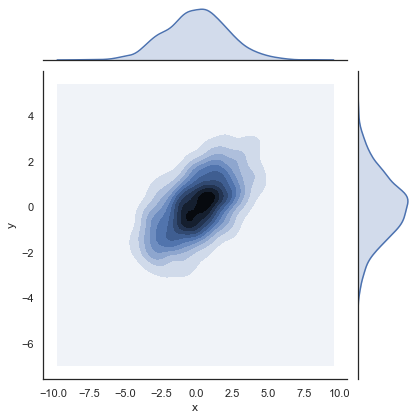

In [16]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

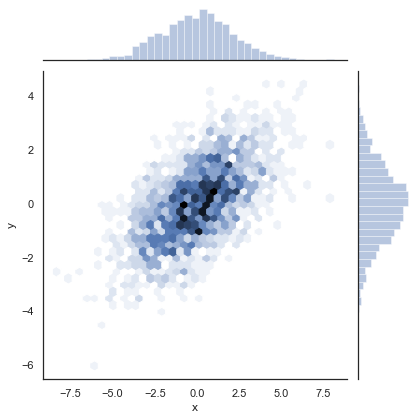

In [18]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

### Pair plots

In [20]:
iris= sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


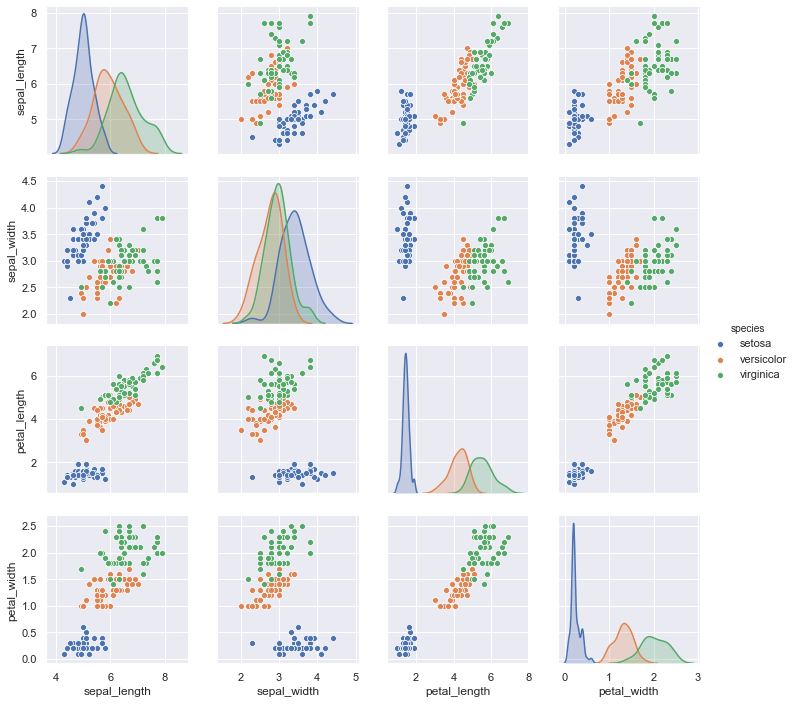

In [21]:
sns.pairplot(iris, hue= 'species', size=2.5);

### Faceted histograms

In [23]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

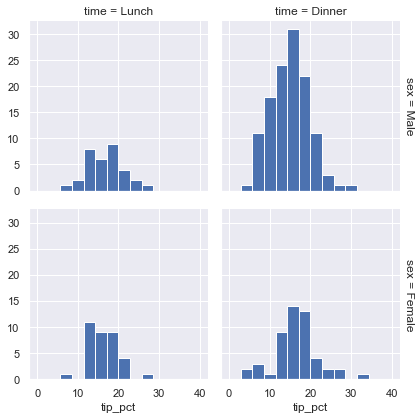

In [25]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

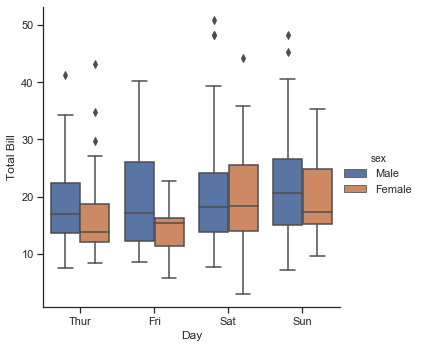

In [28]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

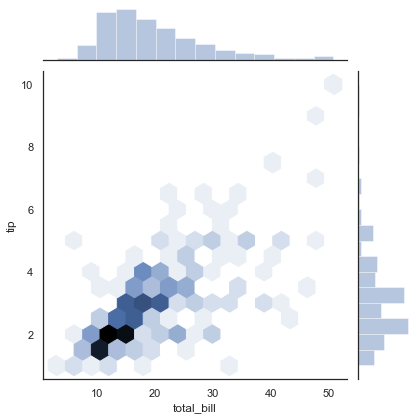

In [30]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

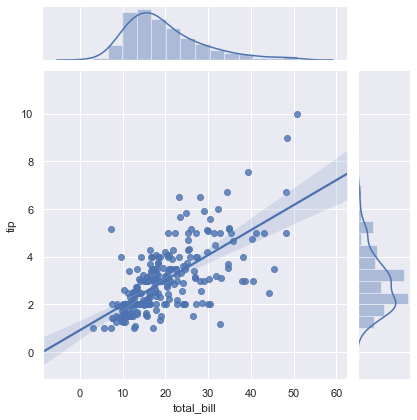

In [31]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

### Bar plots

In [33]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

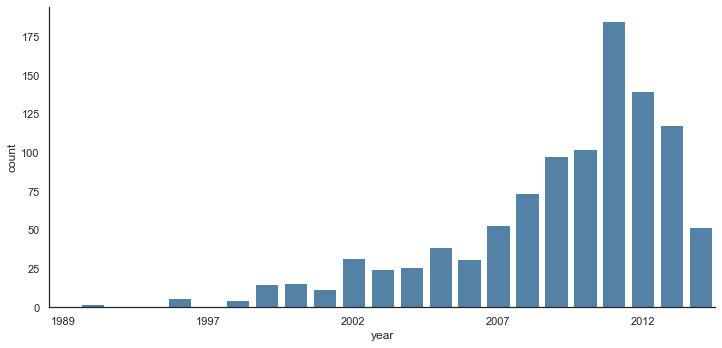

In [36]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

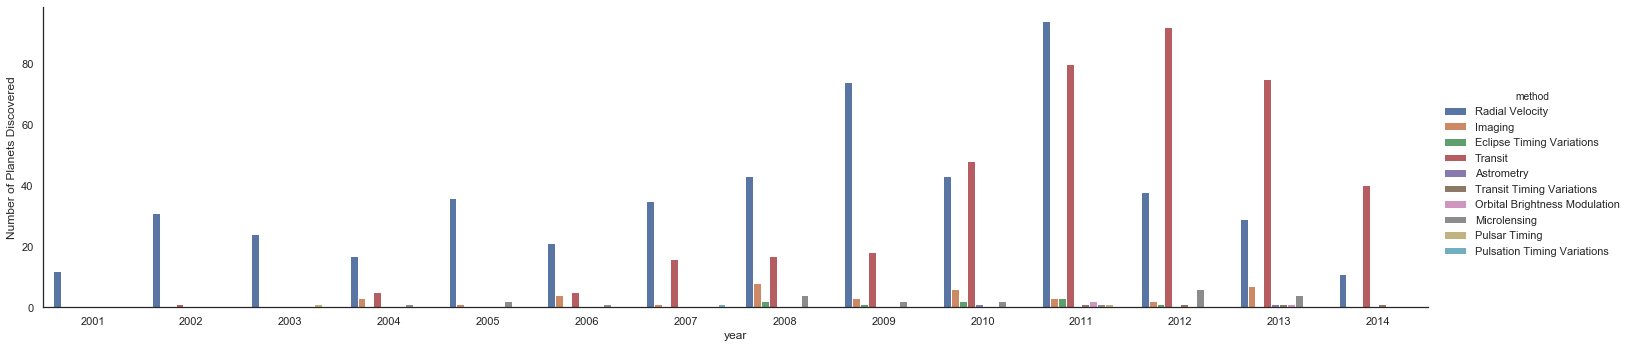

In [38]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Exploring Marathon Finishing Times

In [40]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 56  836k   56  471k    0     0   220k      0  0:00:03  0:00:02  0:00:01  220k
100  836k  100  836k    0     0   339k      0  0:00:02  0:00:02 --:--:--  339k


In [45]:
data = pd.read_csv('data/marathon-data.csv')
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

In [51]:
import pandas as pd
# from pandas import datetools
# import pandas.core.tools.datetimes as datetools
import datetime
from datetime import timedelta
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)
data = pd.read_csv('data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})

In [52]:
data

age gender    split    final
0       33      M 01:05:38 02:08:51
1       32      M 01:06:26 02:09:28
2       31      M 01:06:49 02:10:42
3       38      M 01:06:16 02:13:45
4       31      M 01:06:32 02:13:59
...    ...    ...      ...      ...
37245   18      M 04:24:24 09:32:57
37246   36      M 04:35:43 09:33:28
37247   51      M 04:22:35 09:33:40
37248   55      W 04:58:06 10:00:40
37249   58      W 04:59:49 10:01:08

[37250 rows x 4 columns]

In [54]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [ ]:
# basemap is not completed, there is some issue to import and install it

##                   ------------------------END------------------------